In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [85]:
df = pd.read_csv('1688640705_hr_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [86]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [87]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [88]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [89]:
#Labels 'left' 
#use all previous values as features after PCA
#Encode 'salary' as 0,1,2

df['salary'] = df['salary'].replace({'low': 0, 'medium': 1, 'high': 2})
df = df.drop('sales', axis=1)

In [90]:
data = np.array(df)
data

array([[0.38, 0.53, 2.  , ..., 1.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 1.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 1.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 1.  , 0.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 1.  , 0.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 1.  , 0.  , 0.  ]])

In [91]:
X, y = data[:, :-1], data[:, -1]

In [92]:
#apply std scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [93]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2)
XTrain.shape, XTest.shape, yTrain.shape, yTest.shape

((11999, 8), (3000, 8), (11999,), (3000,))

In [94]:
yTrain = yTrain.reshape(-1, 1)
yTest = yTest.reshape(-1, 1)

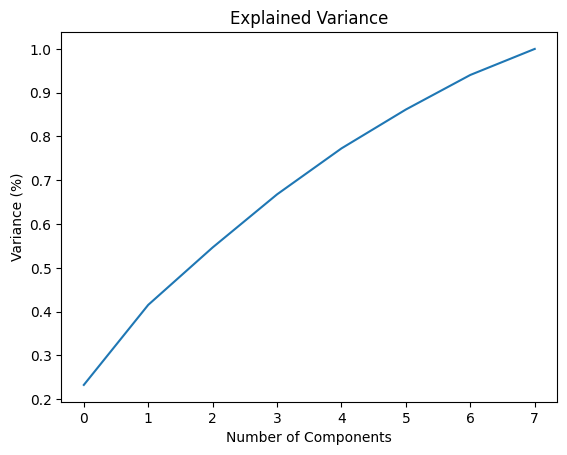

In [95]:
#Principal Component Analysis
pca = PCA(n_components=8)

#Plot the scree graph to find the optimal number of components
pca.fit(XTrain)
variance = pca.explained_variance_ratio_

plt.plot(np.cumsum(variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

5 Components seem good

In [96]:
#PCA with 5 components
pca = PCA(n_components=5)
pca.fit(XTrain)
XTrain = pca.transform(XTrain)
XTest = pca.transform(XTest)

Gaussian Naive Bayes

In [97]:
gnb = GaussianNB()
gnb.fit(XTrain, yTrain)
yPred = gnb.predict(XTest)
accuracy_score(yTest, yPred)


c:\Users\unova\anaconda3\envs\nb\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.472

KNN Classifer

In [98]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(XTrain, yTrain)
yPred = knn.predict(XTest)
accuracy_score(yTest, yPred)


c:\Users\unova\anaconda3\envs\nb\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.5316666666666666

Decision Tree

In [99]:
dt = DecisionTreeClassifier()
dt.fit(XTrain, yTrain)
yPred = dt.predict(XTest)
accuracy_score(yTest, yPred)

0.597

In [100]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(XTrain, yTrain)
yPred = rf.predict(XTest)
accuracy_score(yTest, yPred)

c:\Users\unova\anaconda3\envs\nb\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.6243333333333333

In [101]:
nn = MLPClassifier()
nn.fit(XTrain, yTrain)
yPred = nn.predict(XTest)
accuracy_score(yTest, yPred)

c:\Users\unova\anaconda3\envs\nb\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.485